In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
raw_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
raw_df.nunique()


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
test_df.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [7]:
raw_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
raw_df['Age']=raw_df['Age'].fillna(raw_df['Age'].median())

In [10]:
raw_df["Embarked"].fillna('U',inplace=True)

In [11]:
test_df['Age']=test_df['Age'].fillna(test_df['Age'].median())
test_df["Embarked"].fillna('U',inplace=True)

In [12]:
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

In [13]:
raw_df["Cabin"].fillna('UN',inplace=True)
test_df["Cabin"].fillna('UN',inplace=True)

In [14]:
print(raw_df.isnull().sum())
print(50*'-')
print(test_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
--------------------------------------------------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [15]:
#Data Visualization
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [16]:
import plotly.express as px
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [17]:
px.histogram(raw_df,x='Sex',title='Sexwise Survival Distribution',color='Survived')

From above graph, the conclusion can be made that the females have huge survival rate as compared to males.

Text(0.5, 1.0, "Survival Rate Distribution against Passenger's Class")

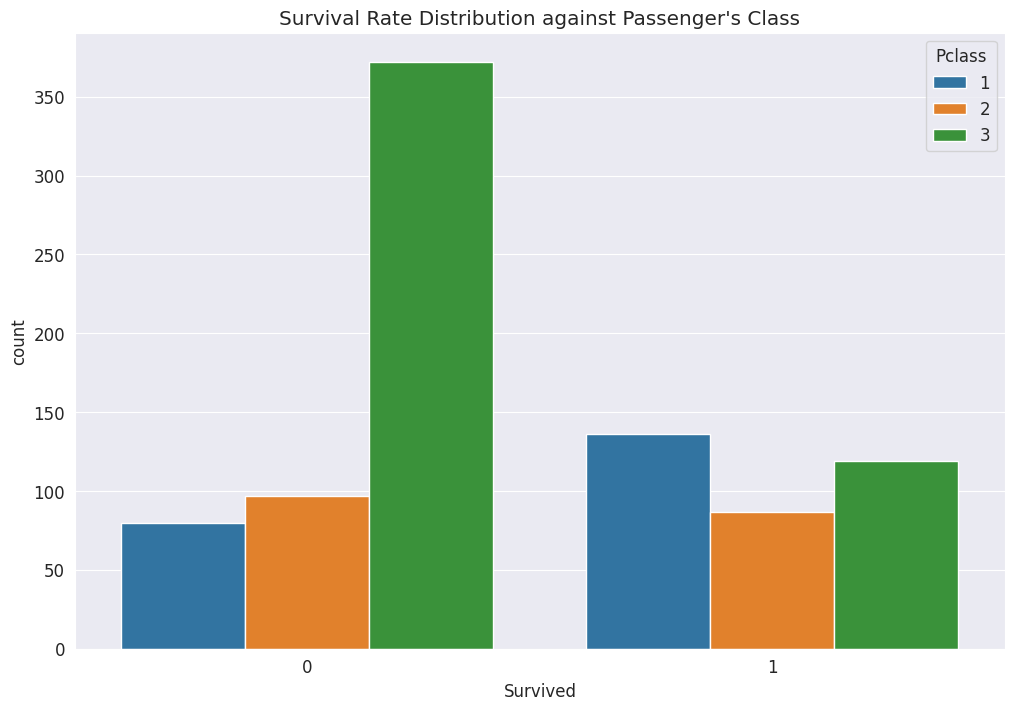

In [18]:
sns.countplot(data=raw_df,x='Survived',hue='Pclass');
plt.title("Survival Rate Distribution against Passenger's Class")

From above plot,It can be said that the first class passengers have more survival rate as compared to second and third class and second class have more survival rate as compared to third class.

Text(0.5, 1.0, 'Embarkation Vs Survival')

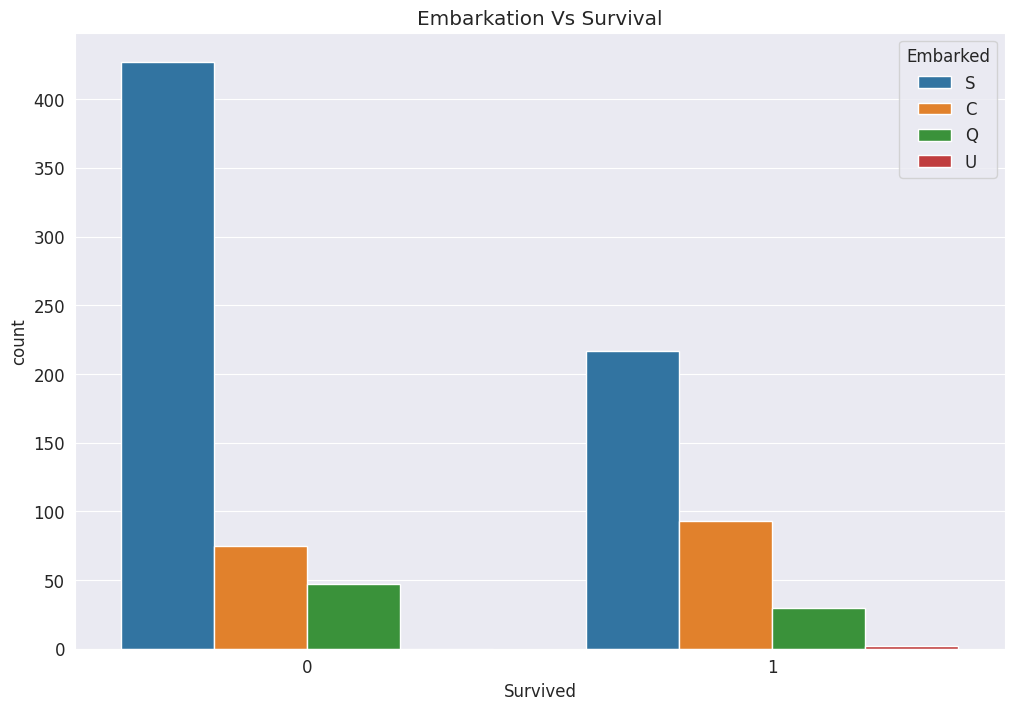

In [19]:
sns.countplot(data=raw_df,x='Survived',hue='Embarked');
plt.title('Embarkation Vs Survival')

In [20]:
px.violin(raw_df,
             x='Cabin',
             color='Survived',
             title='Cabin Vs Survived')

In [21]:
"""from sklearn.preprocessing import OneHotEncoder
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Embarked'] = train_df['Embarked'].astype('category')
train_df['Cabin'] = train_df['Cabin'].astype('category')

train_df['Sex_New'] = train_df['Sex'].cat.codes
train_df['Embarked_New'] = train_df['Embarked'].cat.codes
train_df['Cabin_New'] = train_df['Cabin'].cat.codes

enc=OneHotEncoder()

enc_data=pd.DataFrame(enc.fit_transform(train_df[['Sex_New','Embarked_New','Cabin_New']].toarray())

New_train_df=train_df.join(enc_data)

print(New_train_df)"""

"from sklearn.preprocessing import OneHotEncoder\ntrain_df['Sex'] = train_df['Sex'].astype('category')\ntrain_df['Embarked'] = train_df['Embarked'].astype('category')\ntrain_df['Cabin'] = train_df['Cabin'].astype('category')\n\ntrain_df['Sex_New'] = train_df['Sex'].cat.codes\ntrain_df['Embarked_New'] = train_df['Embarked'].cat.codes\ntrain_df['Cabin_New'] = train_df['Cabin'].cat.codes\n\nenc=OneHotEncoder()\n\nenc_data=pd.DataFrame(enc.fit_transform(train_df[['Sex_New','Embarked_New','Cabin_New']].toarray())\n\nNew_train_df=train_df.join(enc_data)\n\nprint(New_train_df)"

In [22]:
raw_df.shape

(891, 12)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_df,val_df=train_test_split(raw_df,test_size=0.1,random_state=2)

In [25]:
val_df.shape

(90, 12)

In [26]:
train_df.shape

(801, 12)

In [27]:
Inputs_cols=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
target_cols='Survived'

In [28]:
Inputs_cols

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [29]:
train_inputs=train_df[Inputs_cols].copy()
train_targets=train_df[target_cols].copy()

In [30]:
val_inputs=val_df[Inputs_cols].copy()
val_targets=val_df[target_cols].copy()

In [31]:
test_inputs=test_df[Inputs_cols].copy()

In [32]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, 468 to 168
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    801 non-null    int64  
 1   Sex       801 non-null    object 
 2   Age       801 non-null    float64
 3   SibSp     801 non-null    int64  
 4   Parch     801 non-null    int64  
 5   Fare      801 non-null    float64
 6   Embarked  801 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 50.1+ KB


In [33]:
train_inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
468,3,male,28.0,0,0,7.7250,Q
67,3,male,19.0,0,0,8.1583,S
510,3,male,29.0,0,0,7.7500,Q
656,3,male,28.0,0,0,7.8958,S
414,3,male,44.0,0,0,7.9250,S
...,...,...,...,...,...,...,...
534,3,female,30.0,0,0,8.6625,S
584,3,male,28.0,0,0,8.7125,C
493,1,male,71.0,0,0,49.5042,C
527,1,male,28.0,0,0,221.7792,S


In [34]:
train_inputs['Sex'] = train_inputs['Sex'].replace({'male': 0,'female': 1})
test_inputs['Sex'] = test_inputs['Sex'].replace({'male': 0,'female': 1})
val_inputs['Sex'] = val_inputs['Sex'].replace({'male': 0,'female': 1})

train_inputs['Embarked'] = train_inputs['Embarked'].replace({'S': 1,'C': 2,'Q': 3,'U':4})
test_inputs['Embarked'] = test_inputs['Embarked'].replace({'S': 1,'C': 2,'Q': 3,'U':4})
val_inputs['Embarked'] = val_inputs['Embarked'].replace({'S': 1,'C': 2,'Q': 3,'U':4})

In [35]:
train_inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
468,3,0,28.0,0,0,7.7250,3
67,3,0,19.0,0,0,8.1583,1
510,3,0,29.0,0,0,7.7500,3
656,3,0,28.0,0,0,7.8958,1
414,3,0,44.0,0,0,7.9250,1
...,...,...,...,...,...,...,...
534,3,1,30.0,0,0,8.6625,1
584,3,0,28.0,0,0,8.7125,2
493,1,0,71.0,0,0,49.5042,2
527,1,0,28.0,0,0,221.7792,1


In [36]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

In [37]:
model=LogisticRegression(solver='newton-cg')

In [38]:
model.fit(train_inputs,train_targets)

LogisticRegression(solver='newton-cg')

In [39]:
X_train=train_inputs
X_val=val_inputs

In [40]:
train_preds=model.predict(X_train)

In [41]:
train_targets

468    0
67     0
510    1
656    0
414    1
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 801, dtype: int64

In [42]:
train_probs=model.predict_proba(X_train)
train_probs

array([[0.85019079, 0.14980921],
       [0.86595211, 0.13404789],
       [0.8558456 , 0.1441544 ],
       ...,
       [0.83522453, 0.16477547],
       [0.372458  , 0.627542  ],
       [0.50342182, 0.49657818]])

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(train_targets,train_preds)

0.8114856429463171

In [45]:
val_preds=model.predict(X_val)
val_preds

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0])

In [46]:
val_targets

707    1
37     0
615    1
169    0
68     1
      ..
84     1
471    0
384    0
726    1
342    0
Name: Survived, Length: 90, dtype: int64

In [47]:
val_probs=model.predict_proba(X_val)
val_probs

array([[0.65591639, 0.34408361],
       [0.87612967, 0.12387033],
       [0.21125921, 0.78874079],
       [0.89473784, 0.10526216],
       [0.69135127, 0.30864873],
       [0.91398376, 0.08601624],
       [0.91306577, 0.08693423],
       [0.89465206, 0.10534794],
       [0.81743866, 0.18256134],
       [0.79833882, 0.20166118],
       [0.80763044, 0.19236956],
       [0.11075163, 0.88924837],
       [0.43405301, 0.56594699],
       [0.89473784, 0.10526216],
       [0.89473784, 0.10526216],
       [0.40820636, 0.59179364],
       [0.91847982, 0.08152018],
       [0.96242756, 0.03757244],
       [0.25892068, 0.74107932],
       [0.96793843, 0.03206157],
       [0.36806732, 0.63193268],
       [0.44313924, 0.55686076],
       [0.92338286, 0.07661714],
       [0.42888002, 0.57111998],
       [0.79120218, 0.20879782],
       [0.24070308, 0.75929692],
       [0.38315574, 0.61684426],
       [0.67677483, 0.32322517],
       [0.90623791, 0.09376209],
       [0.9109927 , 0.0890073 ],
       [0.

In [48]:
accuracy_score(val_targets,val_preds)

0.7222222222222222

In [49]:
preds=model.predict_proba(test_inputs)
preds

array([[0.88385482, 0.11614518],
       [0.71009675, 0.28990325],
       [0.89675806, 0.10324194],
       [0.90252984, 0.09747016],
       [0.44934792, 0.55065208],
       [0.83710462, 0.16289538],
       [0.30913895, 0.69086105],
       [0.81116399, 0.18883601],
       [0.25416728, 0.74583272],
       [0.93692553, 0.06307447],
       [0.90271405, 0.09728595],
       [0.69564298, 0.30435702],
       [0.06887828, 0.93112172],
       [0.95658646, 0.04341354],
       [0.1881325 , 0.8118675 ],
       [0.17172645, 0.82827355],
       [0.71802864, 0.28197136],
       [0.84420923, 0.15579077],
       [0.49745564, 0.50254436],
       [0.53574685, 0.46425315],
       [0.78010413, 0.21989587],
       [0.81338959, 0.18661041],
       [0.06427888, 0.93572112],
       [0.34900205, 0.65099795],
       [0.1089383 , 0.8910617 ],
       [0.97446245, 0.02553755],
       [0.03876311, 0.96123689],
       [0.852915  , 0.147085  ],
       [0.64301138, 0.35698862],
       [0.93746453, 0.06253547],
       [0.

In [50]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

In [51]:
model=RandomForestClassifier(n_jobs=-1,random_state=3,n_estimators=500,max_depth=20,max_leaf_nodes=10)

In [52]:
%%time
model.fit(X_train,train_targets)

CPU times: user 1.44 s, sys: 228 ms, total: 1.67 s
Wall time: 1.45 s


RandomForestClassifier(max_depth=20, max_leaf_nodes=10, n_estimators=500,
                       n_jobs=-1, random_state=3)

In [53]:
model.score(X_train,train_targets)

0.8476903870162297

In [54]:
model.score(X_val,val_targets)

0.7888888888888889

In [55]:
preds = model.predict_proba(test_inputs)

In [56]:
#XG Boost Model
from xgboost import XGBClassifier

In [57]:
model=XGBClassifier(random_state=5,n_jobs=-1,learning_rate=0.3,max_depth=10,max_leaves=5,n_estimators=20,max_bin=10, min_child_weight=10,booster='gbtree')

In [58]:
%%time
model.fit(X_train,train_targets)

CPU times: user 128 ms, sys: 4.93 ms, total: 133 ms
Wall time: 45.4 ms


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=10,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=5,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=5, ...)

In [59]:
preds=model.predict(X_train)
preds

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [60]:
accuracy_score(train_targets,preds)

0.8614232209737828

In [61]:
val_preds=model.predict(X_val)
val_preds

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0])

In [62]:
accuracy_score(val_targets,val_preds)

0.7444444444444445

In [63]:
preds=model.predict(test_inputs)

In [64]:
y_pred=preds.round()

In [65]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
df=pd.DataFrame(y_pred)
df.tail()

,0
413,0
414,1
415,0
416,0
417,0


In [67]:
passenger=test_df['PassengerId']

In [68]:
submission=pd.concat([passenger,df],axis=1)

In [69]:
submission.head(2)

,PassengerId,0
0,892,0
1,893,0


In [70]:
submission.set_axis(['PassengerId','Survived'], axis='columns')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [71]:
submission.set_index(['PassengerId'])

,0
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [72]:
submission.to_csv("submission.csv",index=False)